# Content-based Movie Recommender System

Data source : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data

In [1]:
# Step 1 necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 'plot description based recommender' necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Read the CSV file
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content-Based-Recommender/movies/movies_metadata.csv')

<ipython-input-2-02015a74586d>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content-Based-Recommender/movies/movies_metadata.csv')


## Step 1 : Exploratory Data Analysis & Data Preprocessing

Let's start with some EDA on the movies_metadata.csv dataset.

EDA helps us understand the data better and prepare it for model building.

In [3]:
# Display the first few rows of the dataset
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Display the basic information and statistics of the dataset
metadata.info()
metadata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
# Convert columns to appropriate data types
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
metadata['id'] = metadata['id'].astype(str)
metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')
metadata['video'] = metadata['video'].astype('bool')
metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors='coerce')

# Display the data types to verify changes
metadata.dtypes

adult                            object
belongs_to_collection            object
budget                          float64
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [6]:
# Check for missing values in each column; to decide how to handel them.
missing_values = metadata.isnull().sum().sort_values(ascending=False)
missing_values

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
release_date                90
status                      87
imdb_id                     17
original_language           11
vote_count                   6
vote_average                 6
title                        6
popularity                   6
spoken_languages             6
revenue                      6
production_companies         3
production_countries         3
budget                       3
original_title               0
id                           0
genres                       0
video                        0
adult                        0
dtype: int64

In [7]:
# Fill missing values for categorical and text columns with appropriate placeholders
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].fillna('No Collection')
metadata['homepage'] = metadata['homepage'].fillna('No Homepage')
metadata['tagline'] = metadata['tagline'].fillna('No Tagline')
metadata['overview'] = metadata['overview'].fillna('')
metadata['poster_path'] = metadata['poster_path'].fillna('No Poster')
metadata['status'] = metadata['status'].fillna(metadata['status'].mode()[0])
metadata['original_language'] = metadata['original_language'].fillna(metadata['original_language'].mode()[0])
metadata['spoken_languages'] = metadata['spoken_languages'].fillna('No Language')
metadata['production_companies'] = metadata['production_companies'].fillna('No Companies')
metadata['production_countries'] = metadata['production_countries'].fillna('No Countries')

# Fill missing values for numerical columns with the median
metadata['runtime'] = metadata['runtime'].fillna(metadata['runtime'].median())
metadata['vote_average'] = metadata['vote_average'].fillna(metadata['vote_average'].median())
metadata['vote_count'] = metadata['vote_count'].fillna(metadata['vote_count'].median())
metadata['revenue'] = metadata['revenue'].fillna(metadata['revenue'].median())
metadata['popularity'] = metadata['popularity'].fillna(metadata['popularity'].median())
metadata['budget'] = metadata['budget'].fillna(metadata['budget'].median())

# Convert release_date to datetime and fill missing values with a placeholder date
metadata['release_date'] = metadata['release_date'].fillna(pd.to_datetime('1900-01-01'))

# Drop rows with missing imdb_id and title as these are crucial for identification
metadata = metadata.dropna(subset=['imdb_id', 'title'])

In [8]:
# Verify no missing values remain
missing_values_after = metadata.isnull().sum().sort_values(ascending=False)
missing_values_after

adult                    0
belongs_to_collection    0
vote_average             0
video                    0
title                    0
tagline                  0
status                   0
spoken_languages         0
runtime                  0
revenue                  0
release_date             0
production_countries     0
production_companies     0
poster_path              0
popularity               0
overview                 0
original_title           0
original_language        0
imdb_id                  0
id                       0
homepage                 0
genres                   0
budget                   0
vote_count               0
dtype: int64

In [9]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Tagline,Toy Story,False,7.7,5415.0
1,False,No Collection,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Homepage,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",No Homepage,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,No Collection,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Homepage,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",No Homepage,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


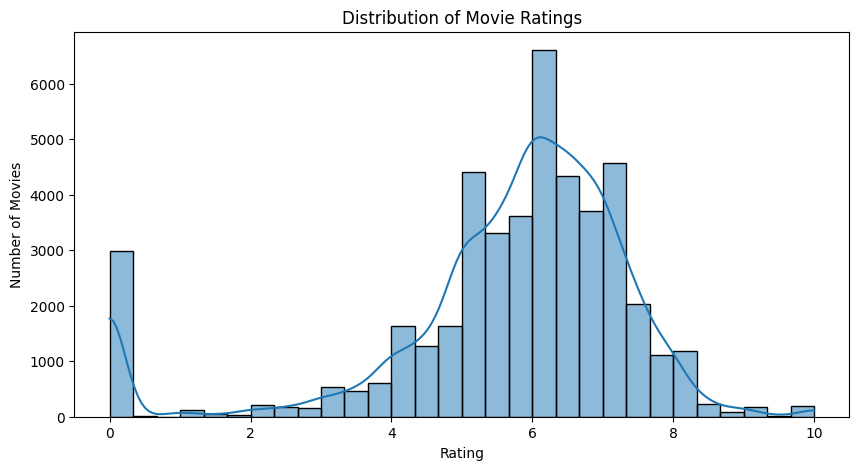

In [10]:
# Plot the distribution of movie ratings
plt.figure(figsize=(10, 5))
sns.histplot(metadata['vote_average'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

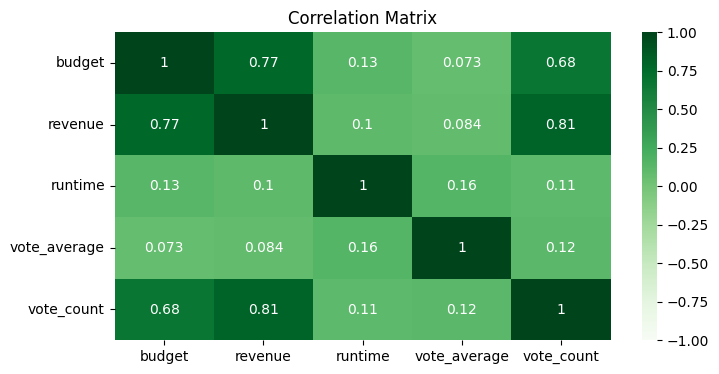

In [11]:
# Select numerical columns for correlation analysis
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Compute the correlation matrix
correlation_matrix = metadata[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Step 2 : Content-Based Recommender

### Plot Description Based Recommender

In [12]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

#### Feature Extraction using TF-IDF Vectorizer

In [13]:
# For the purpose of this example, we'll take a subset of the data
metadata_small = metadata.head(30000)

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata_small['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(30000, 58555)

In [14]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names_out()[3000:3010]

array(['arbatt', 'arbetar', 'arbillot', 'arbiter', 'arbitrarily',
       'arbitrariness', 'arbitrary', 'arbitrate', 'arbois', 'arboleda'],
      dtype=object)

#### Calculating Cosine Similarity

In [15]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape

(30000, 30000)

In [16]:
cosine_sim[1]

array([0.01559318, 1.        , 0.04867483, ..., 0.        , 0.0344052 ,
       0.        ])

#### Building the Recommender System

##### Construct a reverse map of indices and movie titles


In [17]:
indices = pd.Series(metadata_small.index, index=metadata_small['title']).drop_duplicates()

In [18]:
indices[:10]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

##### Define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

##### Testing

In [20]:
print('Movies Similar to "Harry Potter and the Chamber of Secrets" movie:\n\n',get_recommendations('Harry Potter and the Chamber of Secrets'),'\n\n')
print('Movies Similar to "The Matrix" movie:\n\n',get_recommendations('The Matrix'))

Movies Similar to "Harry Potter and the Chamber of Secrets" movie:

 7725         Harry Potter and the Prisoner of Azkaban
10554             Harry Potter and the Goblet of Fire
16128    Harry Potter and the Deathly Hallows: Part 1
17437    Harry Potter and the Deathly Hallows: Part 2
13893          Harry Potter and the Half-Blood Prince
11927       Harry Potter and the Order of the Phoenix
4831              Porn Star: The Legend of Ron Jeremy
4766         Harry Potter and the Philosopher's Stone
18622                            A Very Potter Sequel
26946                                  I Love Trouble
Name: title, dtype: object 


Movies Similar to "The Matrix" movie:

 6515                                  Commando
167                                    Hackers
20707    Underground: The Julian Assange Story
24202                                 Who Am I
9159                                  Takedown
22085                           Berlin Express
9372                             The An

### Credits, Genres, and Keywords Based Recommender

Since the run time has maximum 12.7 GB RAM we will continue 'extending the content-based recommender system with additional features.' on other notebook. [Click here](https://colab.research.google.com/drive/186iMD_R9srk6TszAEHKGQz7VPHqmEdiM?usp=sharing)

In [21]:
metadata_small.to_csv('/content/drive/MyDrive/Colab Notebooks/Content-Based-Recommender/movies/movies_small_metadata.csv', index=False)

## **Q & A**

### A- What We Have Learned from This Code

We've learned how to build a movie recommender system based on movie plot descriptions. This involved:

*   **Text Processing**: Handling missing data and preparing text data for analysis.

*   **Feature Extraction**: Using TF-IDF to turn movie plots into numerical data.

*   **Similarity Calculation**: Using cosine similarity to find movies with similar plots.
*   **Recommendations**: Creating a function that recommends similar movies based on their plots.


### B- The Algorithm Used Description

The algorithm is a content-based filtering, works by:

* **Turning Plots into Numbers**: It converts the movie plots 'overview' into numerical data using TF-IDF, which highlights important words and reduces the weight of common words.
* **Measuring Similarity**: It uses cosine similarity to see how close the plots are to each other in terms of their numerical data.
* **Recommendations**: It finds movies with plots similar to the one you like and suggests the top ones.

### C- An Idea to extend this work for collaborative filtering approach

To improve our recommendations using collaborative filtering, we're aiming to improve how we recommend movies by using data on how users interact with our platform, so we can do the following steps:
* **Data Collection**: Collect user interaction data such as ratings, time watching, skipping, etc.
* **Similarity Calculation**: Calculate similarities between users and movies using methods like cosine similarity.
* **Recommendation**: Predict user preferences for new movies based on similar users or movies, ensuring accuracy with metrics like RMSE.
* **Implementation**: Make sure that real-time updates are smoothly integrated into the user interface to provide users with an improved experience.

### D- Conclusion

In summary, we developed a content-based movie recommender using plot descriptions. We preprocessed text, extracted TF-IDF features, and computed cosine similarities.

While the model provides good recommendations based on plot similarity, it has limitations, such as not considering other factors like user preferences and movie other metadata.
Extending this work to include collaborative filtering can improve the recommendation quality by integrating user behavior and preferences. This hybrid approach can offer a more personalized and relevant movie suggestions for users.